# Literature Data Over Time

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neurodsp.plts.utils import make_axes

In [2]:
# Import local code
from local.utils import replace_multi_int
from local.plts import plot_over_time, savefig

In [3]:
import seaborn as sns
sns.set_context('talk', font_scale=0.85)

## Settings

In [4]:
# Define figure save path folder
save_folder = Path('./figs/')

In [5]:
# Set the notebook run settings 
SAVE_FIG = True

## Load the Data

In [6]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [7]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [8]:
# Drop the null rows
df = df.dropna()

In [9]:
# Set year column to be integers
df['Year'] = df.Year.values.astype(int)

In [10]:
# Replace multiple values per entry with the sum & typecast to float
df = replace_multi_int(df, '# Patients')
df['# Patients'] = df['# Patients'].astype('float')

## # Disorders studied per year

In [11]:
# Collect information per year
n_per_year = {}
for year in sorted(set(df.Year.values)):
    
    if year < 2020:
        continue
    elif year == 2020:
        tdf = df[df.Year <= year]
    else:
        tdf = df[df.Year == year]
    
    tvals = {}
    tvals['arts'] = len(tdf)
    tvals['disorders'] = len(set(tdf.Disorder.values))
    tvals['biomarker'] = sum(tdf.Biomarker == 'yes')
    tvals['interp_ei'] = sum(tdf.Interpretation == 'E/I ratio')
    tvals['modality'] = sum(tdf.Data == 'EEG')
    tvals['method_sp'] = sum(tdf['Fit Method'] == 'specparam')
    tvals['method_lr'] = sum(tdf['Fit Method'] == 'regression')
    tvals['design_bet'] = sum(tdf['Design'] == 'between')
    tvals['analysis_diag'] = sum(tdf['Analysis'] == 'diagnostic')
    tvals['reports_ef'] = sum(tdf['Report Effects Size'] == 'yes')
    tvals['avg_n_clin'] = np.median(tdf['# Patients'])
    
    n_per_year[year] = tvals

In [12]:
# Get list of labels
labels = list(n_per_year[2020].keys())
labels.remove('arts')

In [13]:
# Compute the percentages per measure per year
percs_per_year = {}
for year in n_per_year.keys():
    tvals = {}
    for label in labels:
        tvals[label] = n_per_year[year][label] / n_per_year[year]['arts']
    percs_per_year[year] = tvals

## Visualize Patterns across Time

#### Disorders

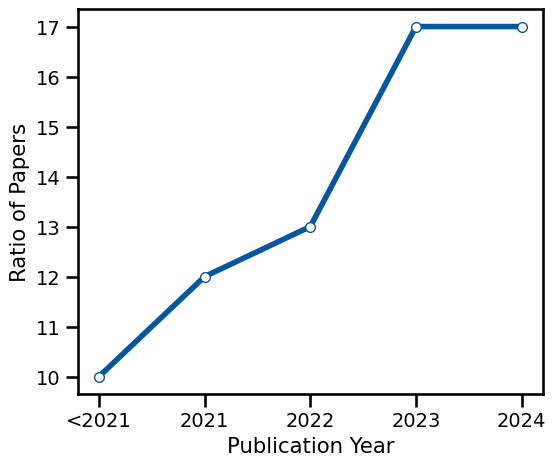

In [14]:
# Disorders - counts
plot_over_time(n_per_year, 'disorders')

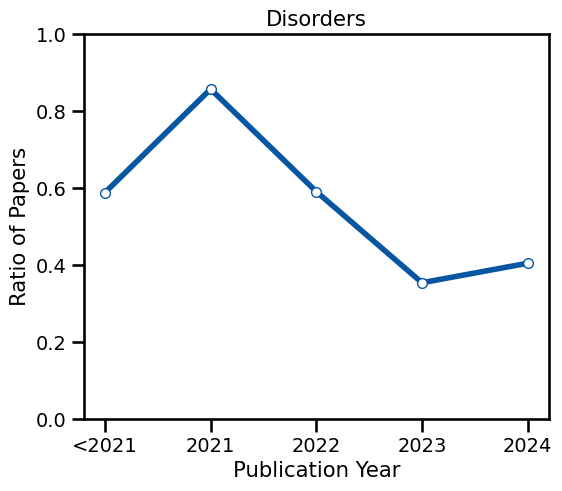

In [15]:
# Disorders - divided by total number of papers
plot_over_time(percs_per_year, 'disorders', title='Disorders')

#### Design & Analyses

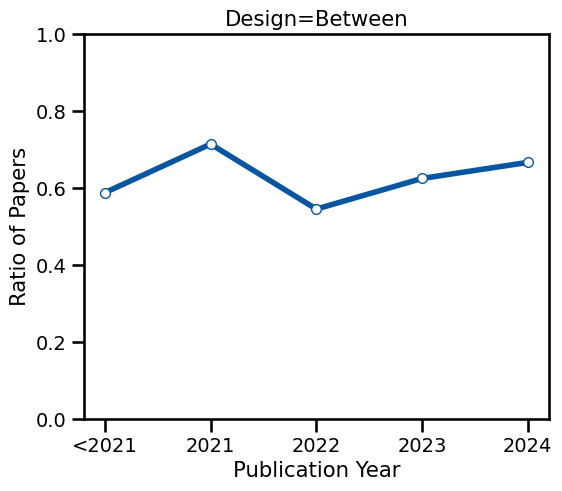

In [16]:
# Design - ratio of papers doing between subjects design
plot_over_time(percs_per_year, 'design_bet', title='Design=Between')

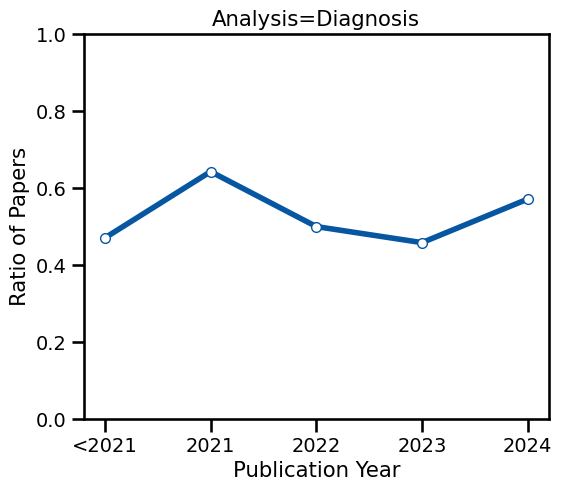

In [17]:
# Analysis - ratio of papers doing diagnostic related analyses
plot_over_time(percs_per_year, 'analysis_diag', title='Analysis=Diagnosis')

#### # of Patients

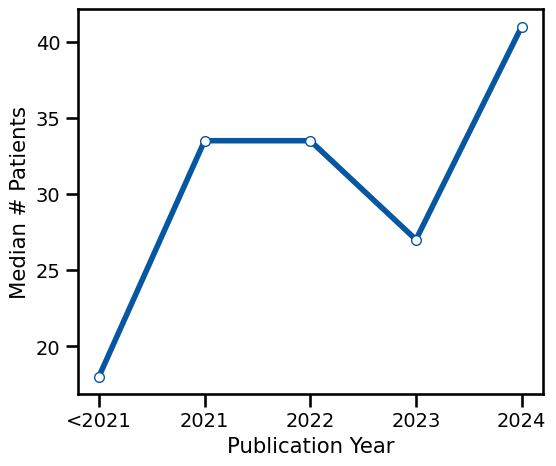

In [18]:
# Median number of clinical patients
plot_over_time(n_per_year, 'avg_n_clin', ylabel='Median # Patients')

#### Reports Effect Size

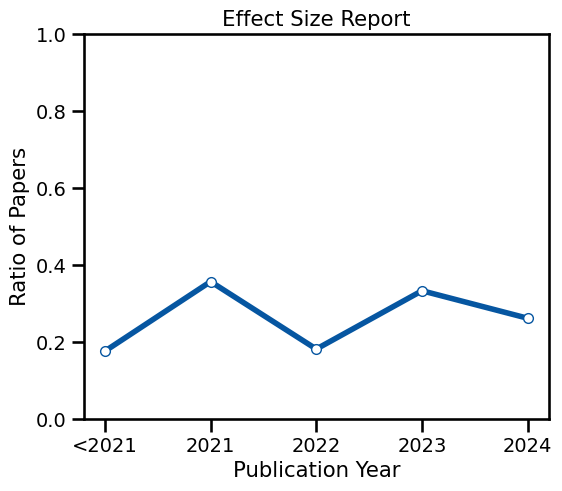

In [19]:
# Ratio of papers that report the effect size
plot_over_time(percs_per_year, 'reports_ef', title='Effect Size Report')

#### Report Biomarker

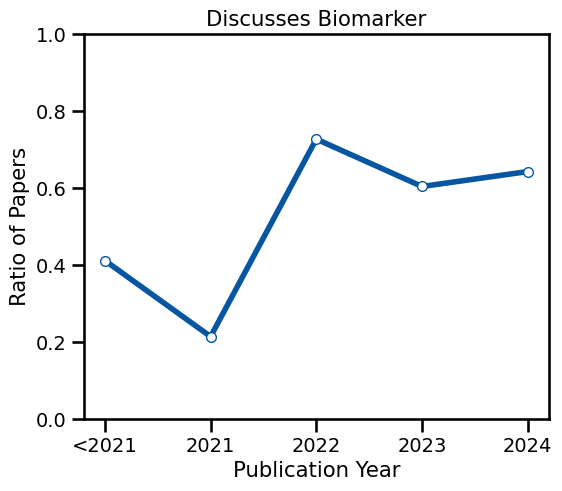

In [20]:
# Ratio of papers that discuss biomarkers
plot_over_time(percs_per_year, 'biomarker', title='Discusses Biomarker')

#### Report E/I Interpration

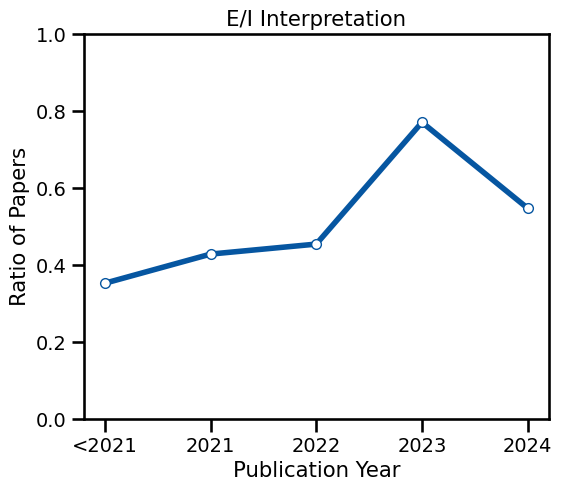

In [21]:
# Ratio of papers that discuss E/I ratio interpretation
plot_over_time(percs_per_year, 'interp_ei', title='E/I Interpretation')

#### Modality 

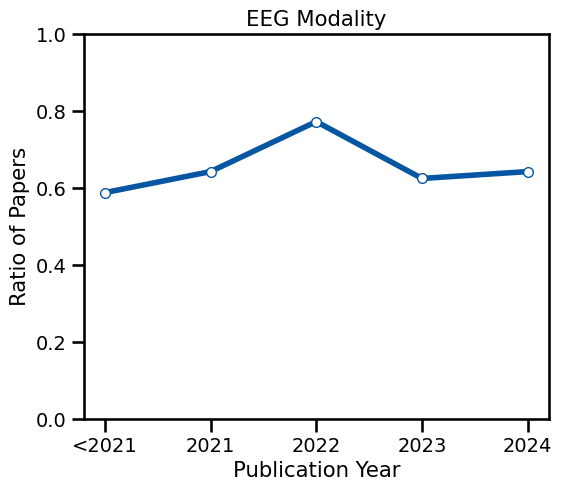

In [22]:
# Ratio of papers using EEG
plot_over_time(percs_per_year, 'modality', title='EEG Modality')

#### Fit method

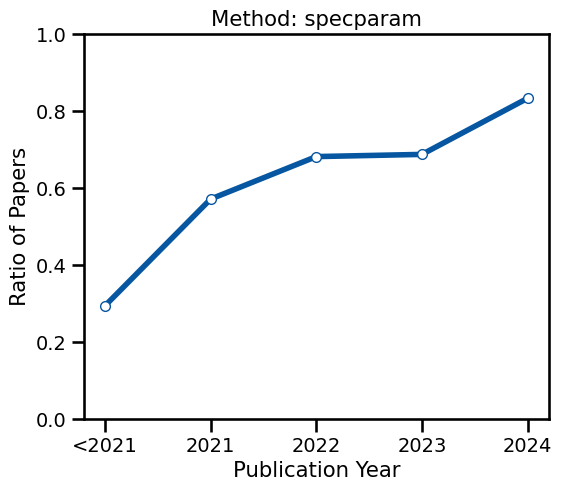

In [23]:
# Ratio of papers using specparam
plot_over_time(percs_per_year, 'method_sp', title='Method: specparam')

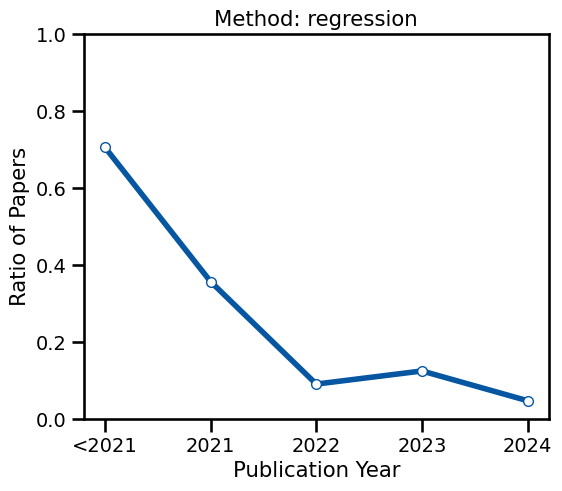

In [24]:
# Ratio of papers using linear regression
plot_over_time(percs_per_year, 'method_lr', title='Method: regression')

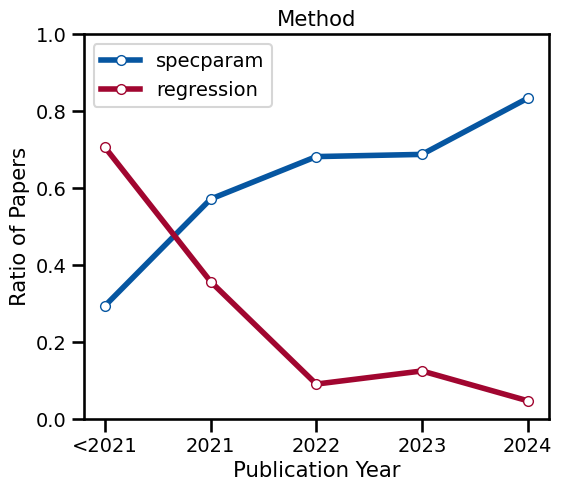

In [25]:
# Plot methods together
plot_over_time(percs_per_year, 'method_sp', title='Method', label='specparam')
plot_over_time(percs_per_year, 'method_lr', color='#a10630', label='regression', ax=plt.gca())
plt.gca().legend()

### Plot Multi-Panel Figure

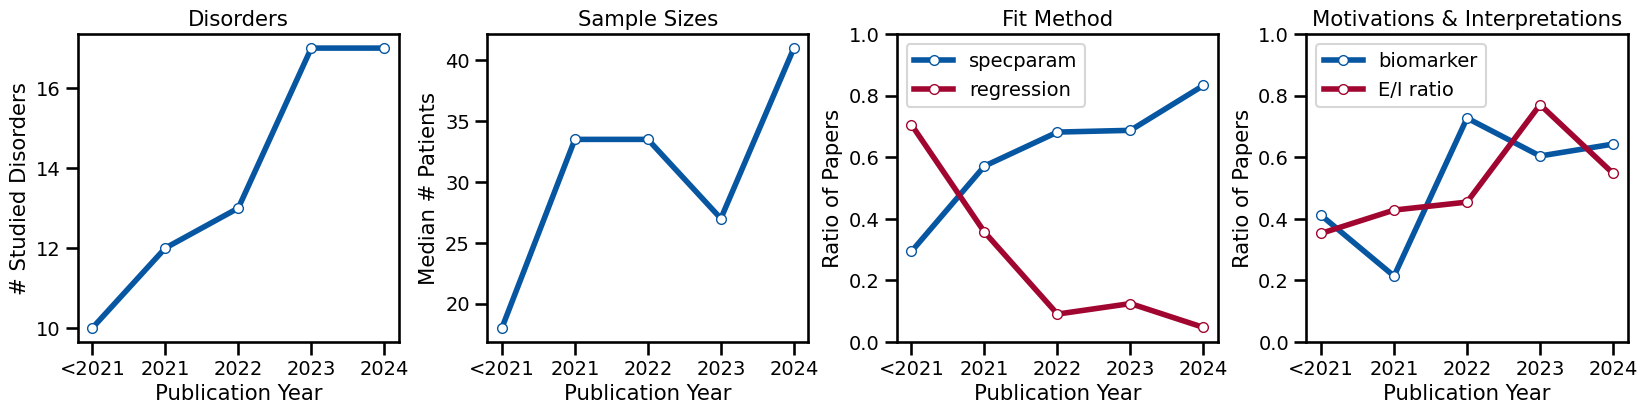

In [26]:
# Plot multiple measures over time together
axes = make_axes(1, 4, wspace=0.275, figsize=(20, 4))
plot_over_time(n_per_year, 'disorders', title='Disorders', ylabel='# Studied Disorders', ax=axes[0])
plot_over_time(n_per_year, 'avg_n_clin', title='Sample Sizes', ylabel='Median # Patients', ax=axes[1])
plot_over_time(percs_per_year, 'method_sp', title='Fit Method', label='specparam', ax=axes[2])
plot_over_time(percs_per_year, 'method_lr', color='#a10630', label='regression', ax=axes[2])
plot_over_time(percs_per_year, 'biomarker', title='Motivations & Interpretations',
               label='biomarker', ax=axes[3])
plot_over_time(percs_per_year, 'interp_ei', label='E/I ratio', color='#a10630', ax=axes[3])
axes[2].legend();
axes[3].legend();
savefig(SAVE_FIG, 'results_over_time.pdf', save_folder)